# Inductive Miner

## Step 1: Handling and import event data

In [9]:
import pm4py
from pm4py.objects.log.importer.xes import importer as xes_importer
from pm4py.algo.discovery.inductive import algorithm as inductive_miner

log = xes_importer.apply("../Sepsis Cases - Event Log.xes")

parsing log, completed traces ::   0%|          | 0/1050 [00:00<?, ?it/s]

## Step 2: Mining event log - Process Discovery

In [10]:
from pm4py.algo.discovery.inductive import algorithm as inductive_miner
from pm4py.visualization.process_tree import visualizer as pt_visualizer

net, initial_marking, final_marking = inductive_miner.apply(log)

tree = inductive_miner.apply_tree(log)

## Step 3: Visualize Petri net and Process Tree of Mined Process from log

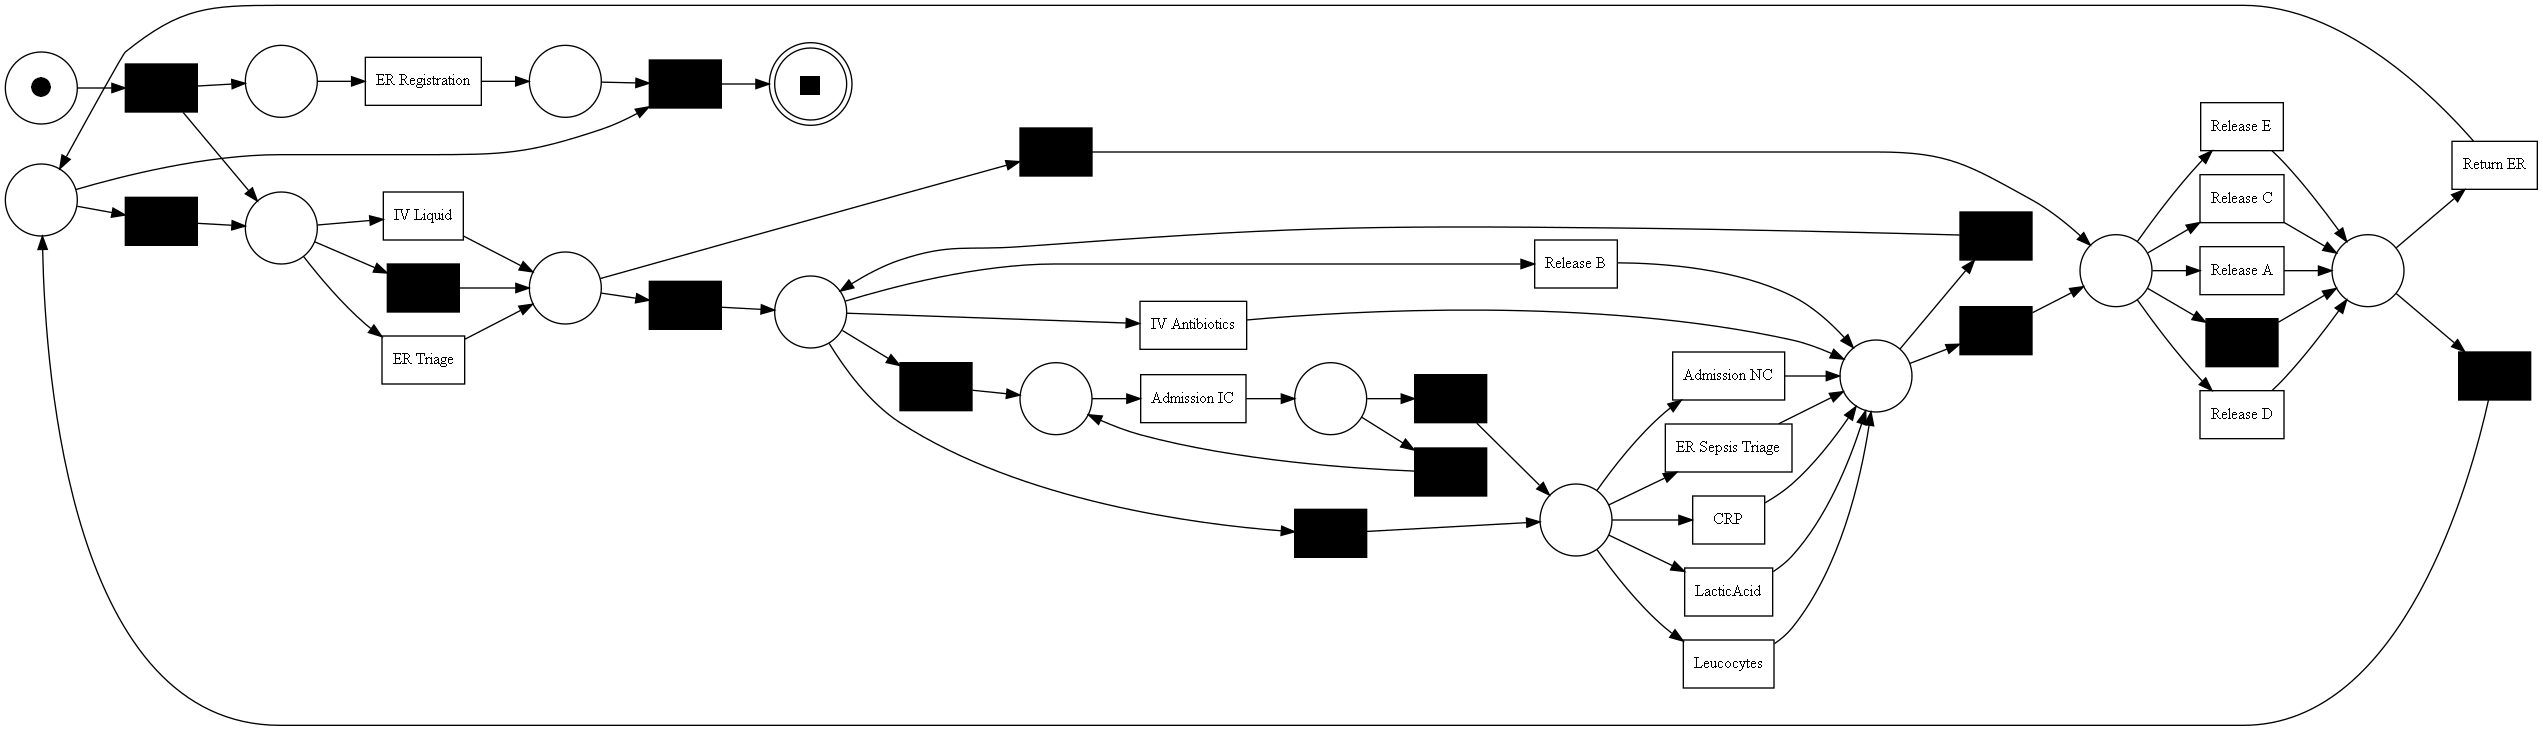

In [11]:
pm4py.view_petri_net(net, initial_marking, final_marking)

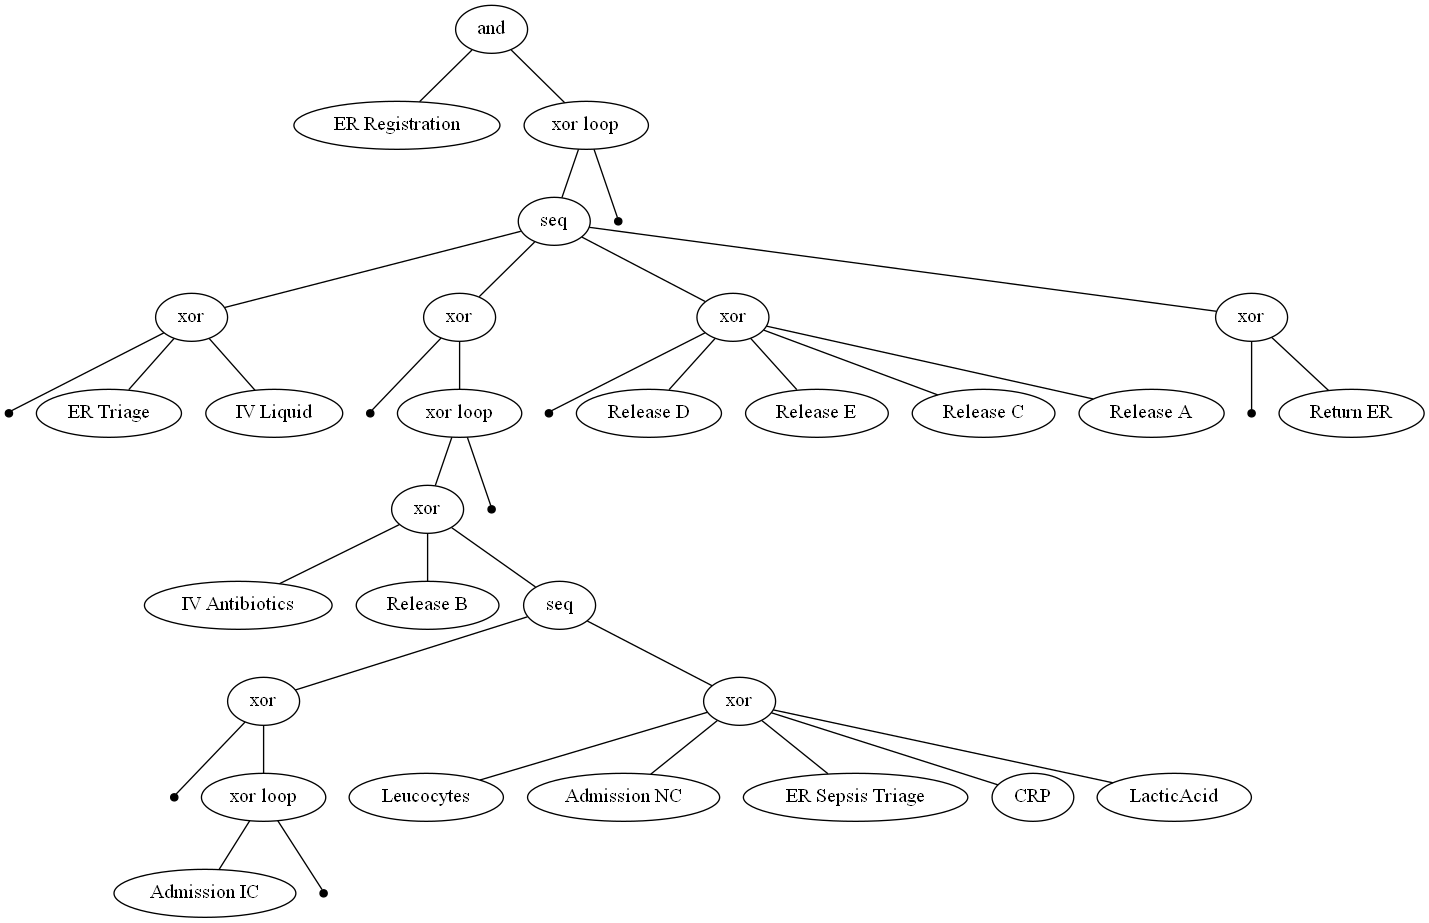

In [12]:
gviz = pt_visualizer.apply(tree)
pt_visualizer.view(gviz)

## Step 4: Convert Petri Net to BPMN

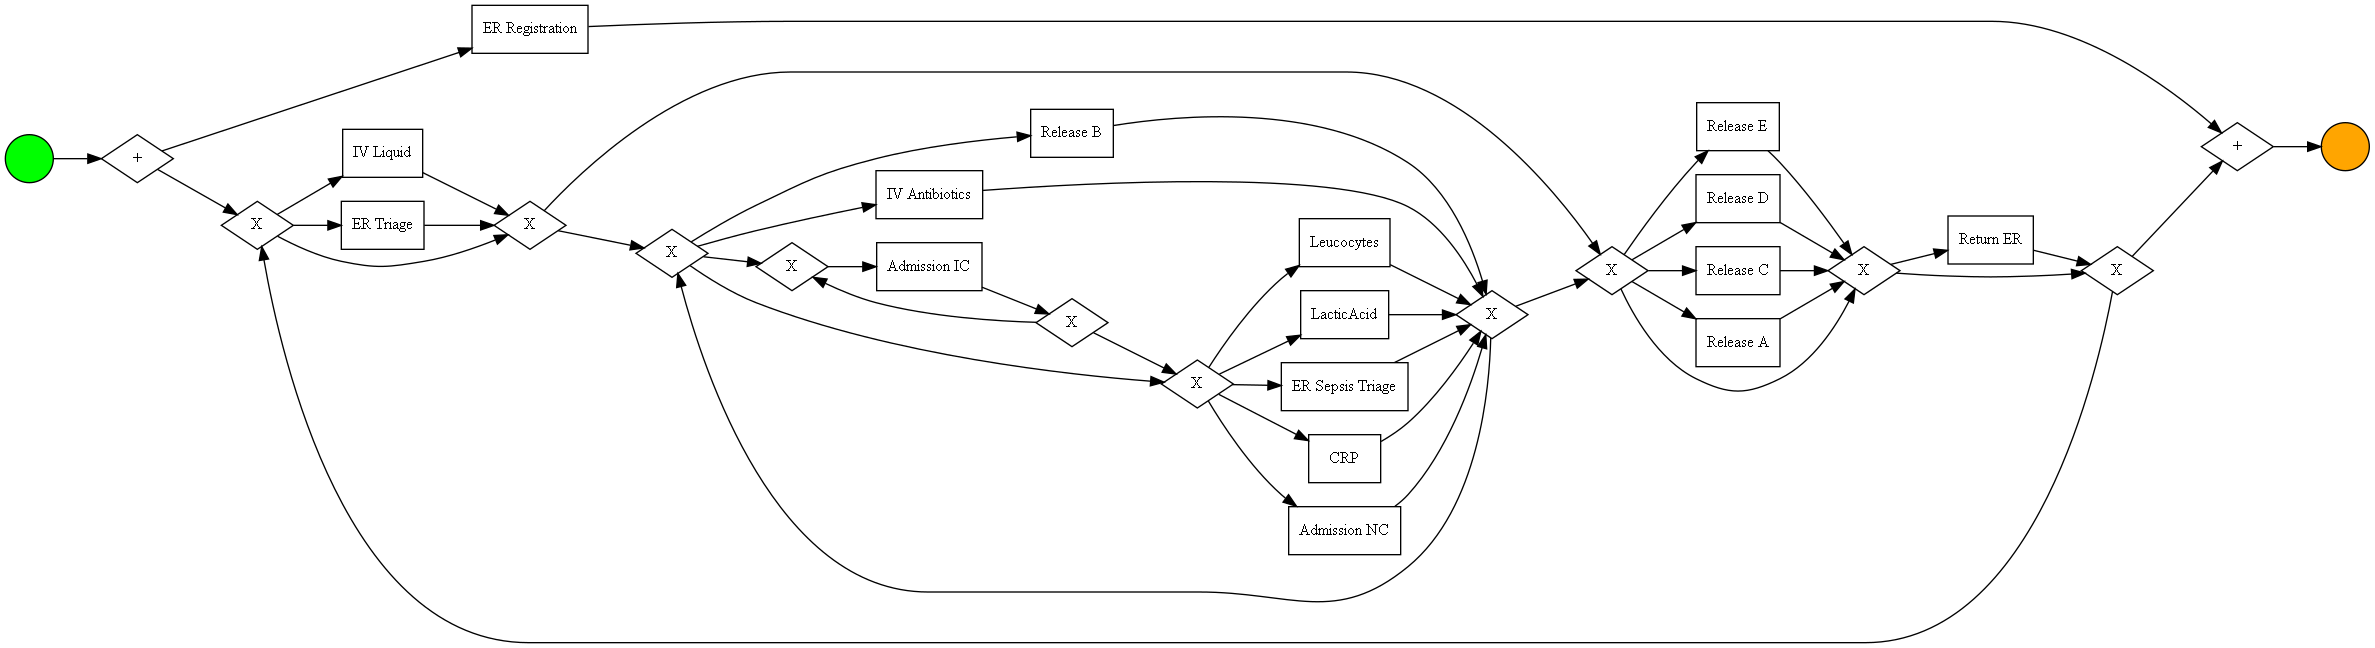

In [21]:
bpmn_graph = pm4py.convert_to_bpmn(*[net, initial_marking, final_marking])
pm4py.view_bpmn(bpmn_graph, "png")

## Step 5: Log-Model Evaluatio

### Replay Fitness

In [15]:
from pm4py.algo.evaluation.replay_fitness import algorithm as replay_fitness_evaluator
fitness = replay_fitness_evaluator.apply(log, net,  initial_marking, final_marking, variant=replay_fitness_evaluator.Variants.TOKEN_BASED)

replaying log with TBR, completed variants ::   0%|          | 0/846 [00:00<?, ?it/s]

In [16]:
fitness

{'perc_fit_traces': 100.0,
 'average_trace_fitness': 1.0,
 'log_fitness': 1.0,
 'percentage_of_fitting_traces': 100.0}

### Precision

In [17]:
from pm4py.algo.evaluation.precision import algorithm as precision_evaluator
prec = precision_evaluator.apply(log, net, initial_marking, final_marking, variant=precision_evaluator.Variants.ETCONFORMANCE_TOKEN)

replaying log with TBR, completed variants ::   0%|          | 0/5886 [00:00<?, ?it/s]

In [18]:
prec

0.1911307349295207

### F-measure

In [19]:
def f_measure(f, p):
    return (2*f*p)/(f+p)

f_measure(fitness['average_trace_fitness'], prec)

0.320923185549116